# Titanic Survival Predicition :

## Steps To be Completed :

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

### 1. Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [5]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [6]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [7]:
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


### a. Data Visualization

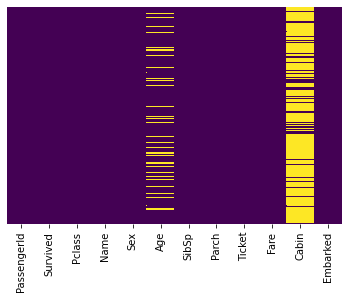

In [8]:
# Age,cabin,embarked having nan values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

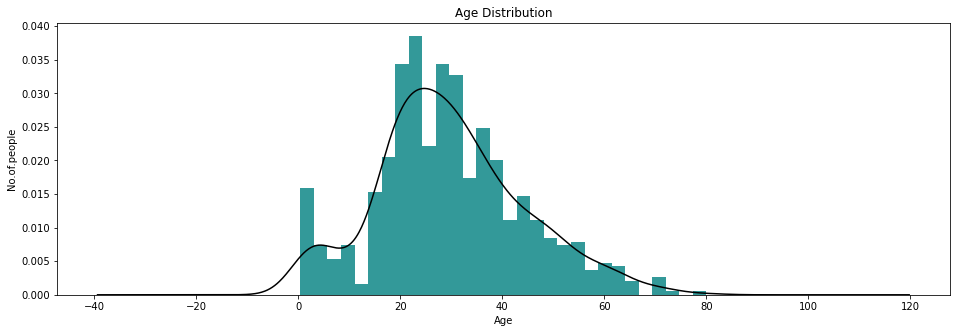

In [9]:
age_dist = df['Age'].hist(bins=30,density=True,color='teal',alpha=0.8,figsize=(16,5))
df['Age'].plot(kind='density',color='black') # this is for removing grid and plotting dist in histogram and you need to mension in hist also true
age_dist.set_xlabel('Age')
age_dist.set_ylabel('No.of.people')
age_dist.set_title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Fare Distribution')

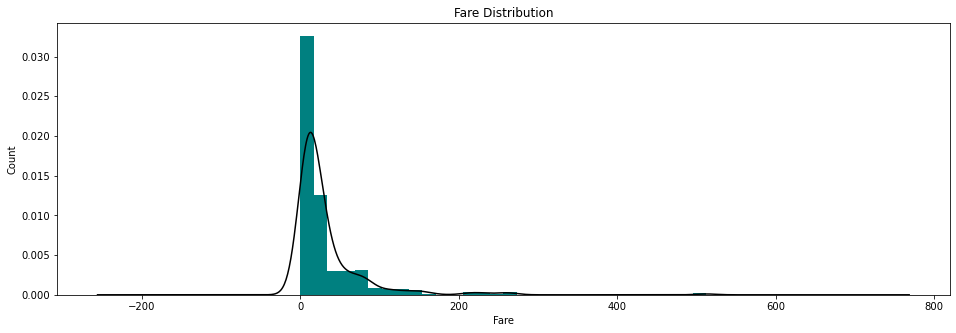

In [10]:
fare_dist = df['Fare'].hist(bins=30,density=True,stacked=True,color='teal',figsize=(16,5))
df['Fare'].plot(kind='density',color='black')
fare_dist.set_xlabel('Fare')
fare_dist.set_ylabel('Count')
fare_dist.set_title('Fare Distribution')

So, we need to transform this into gaussioan distribution

Text(0.5, 1.0, 'Male')

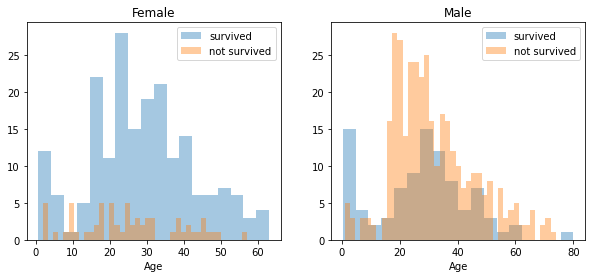

In [11]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label= survived, ax = axes[0] , kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label= not_survived, ax = axes[0] , kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),bins=18,label= survived, ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),bins=40,label= not_survived, ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')


Text(0.5, 1.0, 'Male')

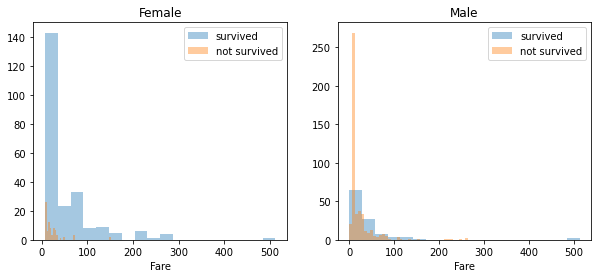

In [12]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Fare.dropna(), bins=18, label= survived, ax = axes[0] , kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Fare.dropna(), bins=40, label= not_survived, ax = axes[0] , kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Fare.dropna(),bins=18,label= survived, ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Fare.dropna(),bins=40,label= not_survived, ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')

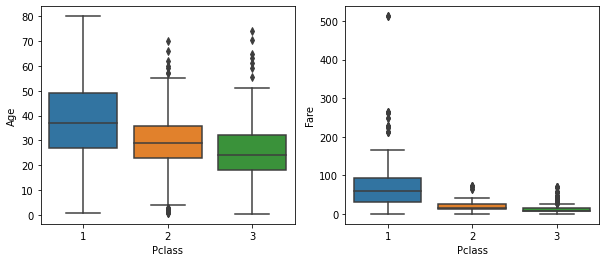

In [13]:
fig = plt.subplots(figsize = (10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Pclass'],y=df['Age'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Pclass'],y=df['Fare'])

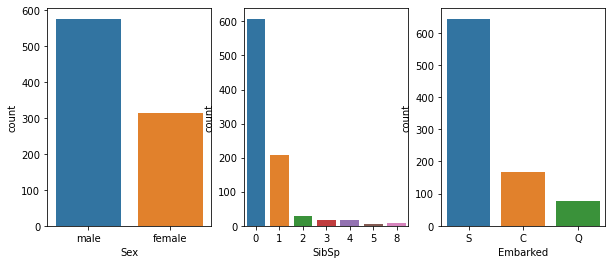

In [14]:
fig = plt.subplots(figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(df['Sex'])
plt.subplot(1,3,2)
sns.countplot(df['SibSp'])
plt.subplot(1,3,3)
sns.countplot(df['Embarked'])

## 2. Feature Engineering

### a.1 Missing Values ( Numerical Data )

* Mean/ Median/Mode replacement
* Random Sample Imputation
* Capturing NAN values with a new feature
* End of Distribution imputation
* Arbitrary imputation

In [15]:
df['Age'].isnull().sum(),df['Cabin'].isnull().sum(),df['Embarked'].isnull().sum()

(177, 687, 2)

In [16]:
# Finding the relationship
df.groupby("Survived")['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

#### Imputing median value to age

In [17]:
def impute_median(data,var,median):
    data[var+'_median'] = data[var].fillna(median)

In [18]:
impute_median(df,'Age',df['Age'].median())

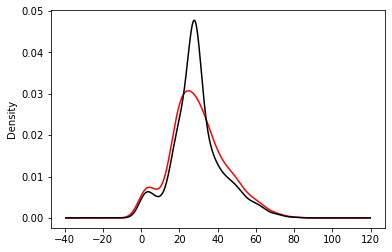

In [19]:
df['Age'].plot(kind='density',color='red')
df['Age_median'].plot(kind='density',color='black')

This is not fit correctly because the original and median are varrying in density

#### Imputing Random Value

In [20]:
def impute_nan(df,var):
    df[var+'_random'] = df[var]
    random_var = df[var].dropna().sample(df[var].isnull().sum(),random_state=0)    # taking all age values except nan and randomly selected
    random_var.index = df[df[var].isnull()].index     # taking the nan value index
    df.loc[df[var].isnull(),var+'_random'] = random_var

In [21]:
impute_nan(df,'Age')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [23]:
df['Age_random'].isnull().sum()

0

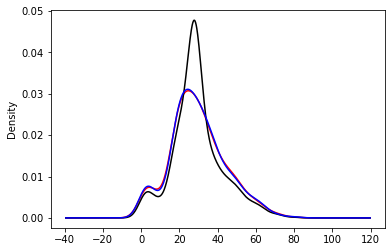

In [24]:
df['Age'].plot(kind='density',color='red')
df['Age_median'].plot(kind='density',color='black')
df['Age_random'].plot(kind = 'density',color='blue')

The original and random sample has same distribution

### a.2 Missing Values ( Categorical Values )

   6. Frequent categories imputation ( mode )
   7. Adding another feature to capture nan value
   8. Replacing nan with a new category in a feature
    

In [25]:
# Embarked
def impute_nan(df,var):
    df[var+'_newvar'] = np.where(df[var].isnull(),'M',df[var])

In [26]:
impute_nan(df,'Embarked')

In [27]:
df['Embarked_newvar'].value_counts()

S    644
C    168
Q     77
M      2
Name: Embarked_newvar, dtype: int64

In [28]:
# Cabin
def impute_nan(df,var):
    df[var+'_newvar'] = np.where(df[var].isnull(),'Missing',df[var])
    df[var+'_newvar'] = df[var+'_newvar'].astype(str).str[0]

In [29]:
impute_nan(df,'Cabin')

In [30]:
df['Cabin_newvar'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_newvar, dtype: int64

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median',
       'Age_random', 'Embarked_newvar', 'Cabin_newvar'],
      dtype='object')

In [32]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Embarked_newvar,Cabin_newvar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,C,C


In [33]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Age_median'],inplace=True,axis=1)
df.drop('Age',inplace=True,axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_random,Embarked_newvar,Cabin_newvar
0,0,3,male,1,0,7.2500,22.0,S,M
1,1,1,female,1,0,71.2833,38.0,C,C
2,1,3,female,0,0,7.9250,26.0,S,M
3,1,1,female,1,0,53.1000,35.0,S,C
4,0,3,male,0,0,8.0500,35.0,S,M


### b. Converting Categorical to Numerical value
   9. One hot encoding
   10. One hot encoding with multiple features
   11. Ordinal encoidng
   12. Count or Frequency encoding ( Mode )
   13. Target guided ordinal encoing
   14. Mean ordinal encoding
   15. Probability Ratio encoding

In [39]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [40]:
data = pd.concat([sex,df],axis=1)

In [41]:
data.head()

,male,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_random,Embarked_newvar,Cabin_newvar
0,1,0,3,male,1,0,7.2500,22.0,S,M
1,0,1,1,female,1,0,71.2833,38.0,C,C
2,0,1,3,female,0,0,7.9250,26.0,S,M
3,0,1,1,female,1,0,53.1000,35.0,S,C
4,1,0,3,male,0,0,8.0500,35.0,S,M


In [42]:
# Embark ( ordinal encoding )
df['Embarked_newvar'].value_counts()

S    644
C    168
Q     77
M      2
Name: Embarked_newvar, dtype: int64

In [43]:
dict={'S':1,'C':2,'Q':3,'M':4}

In [44]:
data['embark'] = data['Embarked_newvar'].map(dict)

In [46]:
data.drop(['Sex','Embarked_newvar'],inplace=True,axis=1)
data.head()

,male,Survived,Pclass,SibSp,Parch,Fare,Age_random,Cabin_newvar,embark
0,1,0,3,1,0,7.2500,22.0,M,1
1,0,1,1,1,0,71.2833,38.0,C,2
2,0,1,3,0,0,7.9250,26.0,M,1
3,0,1,1,1,0,53.1000,35.0,C,1
4,1,0,3,0,0,8.0500,35.0,M,1


In [48]:
# Target guided encoding
data['Cabin_newvar'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [55]:
data.groupby('Cabin_newvar')['Survived'].mean().sort_values(ascending=False)

Cabin_newvar
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [56]:
ordinal_labels = data.groupby('Cabin_newvar')['Survived'].mean().sort_values(ascending=False).index

In [57]:
ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
ordinal_labels2

{'D': 1, 'E': 2, 'B': 3, 'F': 4, 'C': 5, 'G': 6, 'A': 7, 'M': 8, 'T': 9}

In [58]:
data['cabin_labels'] = data['Cabin_newvar'].map(ordinal_labels2)

In [59]:
data.head()

,male,Survived,Pclass,SibSp,Parch,Fare,Age_random,Cabin_newvar,embark,cabin_labels
0,1,0,3,1,0,7.2500,22.0,M,1,8
1,0,1,1,1,0,71.2833,38.0,C,2,5
2,0,1,3,0,0,7.9250,26.0,M,1,8
3,0,1,1,1,0,53.1000,35.0,C,1,5
4,1,0,3,0,0,8.0500,35.0,M,1,8


In [60]:
data.drop('Cabin_newvar',inplace=True,axis=1)

In [61]:
data.head()

,male,Survived,Pclass,SibSp,Parch,Fare,Age_random,embark,cabin_labels
0,1,0,3,1,0,7.2500,22.0,1,8
1,0,1,1,1,0,71.2833,38.0,2,5
2,0,1,3,0,0,7.9250,26.0,1,8
3,0,1,1,1,0,53.1000,35.0,1,5
4,1,0,3,0,0,8.0500,35.0,1,8


### c. Gaussian Transformation
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square root Transformation
4. Exponential Transformation
5. Boxcox Transforamtion

In [62]:
import scipy.stats as stats

In [63]:
def diag_plt(df,var):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[var].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist='norm',plot=plt)
    
    plt.show()

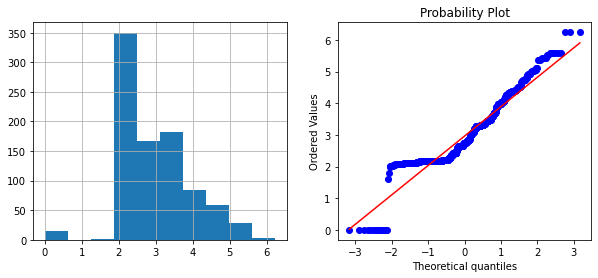

In [66]:
# Log Transformation
data['fare'] = np.log(data['Fare'] + 1)
diag_plt(data,'fare')

In [ ]:
data.drop('Fare',inplace=True,axis=1)

In [70]:
data.head()

,male,Survived,Pclass,SibSp,Parch,Age_random,embark,cabin_labels,fare
0,1,0,3,1,0,22.0,1,8,2.110213
1,0,1,1,1,0,38.0,2,5,4.280593
2,0,1,3,0,0,26.0,1,8,2.188856
3,0,1,1,1,0,35.0,1,5,3.990834
4,1,0,3,0,0,35.0,1,8,2.202765


### d. Outliers

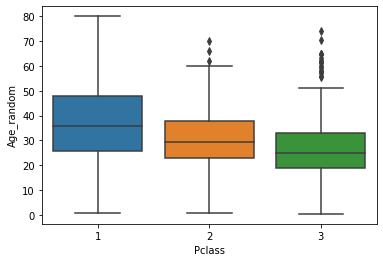

In [73]:
sns.boxplot(x=data['Pclass'],y=data['Age_random'])

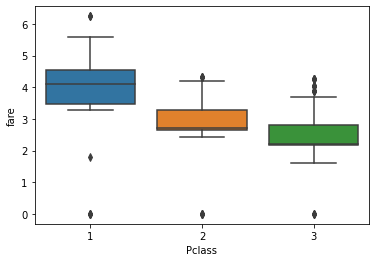

In [74]:
sns.boxplot(x=data['Pclass'],y=data['fare'])

In [77]:
data['Age_random'].mean() , data['fare'].mean()

(29.700347923681257, 2.9622457416890775)

In [137]:
# z_score
# outliers = []
def detect_outliers_age(df,var):
    threshold=3
    mean=np.mean(df[var])
    std=np.std(df[var])
    
    for i in df[var]:
        z = (i-mean)/std
        if np.abs(z) > 3:
            # outliers.append(i)
            return data[var].replace(i,data['Age_random'].mean(),inplace=True)

In [138]:
detect_outliers_age(data,'Age_random')

In [139]:
np.max(data['Age_random'])

71.0

In [140]:
def detect_outliers_fare(df,var):
    threshold=3
    mean=np.mean(df[var])
    std=np.std(df[var])
    
    for i in df[var]:
        z = (i-mean)/std
        if np.abs(z) > 3:
            # outliers.append(i)
            return data[var].replace(i,data['fare'].mean(),inplace=True)

In [141]:
detect_outliers_fare(data,'fare')

In [142]:
np.max(data['fare'])

6.240917354759096

## e. Feature Scaling
* standardisation - z = x - X / sd ( mean = 0 , sd = 1 ) range between 0 to 1
* mean normalization - z = x - mean(x) / max(x) - min(x) range between -1 to 1
* min - max scaling - z = x - min(x) / max(x) - min(x)
* unit vector - z = x / || x ||

In [145]:
final_data = [features for features in data.columns if features not in ['Survived']]
final_data

['male',
 'Pclass',
 'SibSp',
 'Parch',
 'Age_random',
 'embark',
 'cabin_labels',
 'fare']

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scaler = MinMaxScaler()

In [150]:
scaler.fit(data[final_data])

MinMaxScaler()

In [152]:
scaler.transform(data[final_data])

array([[1.        , 1.        , 0.125     , ..., 0.        , 0.875     ,
        0.10764318],
       [0.        , 0.        , 0.125     , ..., 0.33333333, 0.5       ,
        0.57651078],
       [0.        , 1.        , 0.        , ..., 0.        , 0.875     ,
        0.12463247],
       ...,
       [0.        , 1.        , 0.125     , ..., 0.        , 0.875     ,
        0.34234206],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.5       ,
        0.39361834],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.875     ,
        0.12035451]])

In [154]:
data = pd.concat([data[['Survived']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[final_data]), columns=final_data)],
                    axis=1)

In [155]:
data.head()

,Survived,male,Pclass,SibSp,Parch,Age_random,embark,cabin_labels,fare
0,0,1.0,1.0,0.125,0.0,0.305752,0.000000,0.875,0.107643
1,1,0.0,0.0,0.125,0.0,0.532445,0.333333,0.500,0.576511
2,1,0.0,1.0,0.000,0.0,0.362426,0.000000,0.875,0.124632
3,1,0.0,0.0,0.125,0.0,0.489940,0.000000,0.500,0.513914
4,0,1.0,1.0,0.000,0.0,0.489940,0.000000,0.875,0.127637


In [156]:
data.to_csv('scaled_Titanic.csv',index=False)

In [165]:
len(data[data['Survived'] == 1]) , len(data[data['Survived'] == 0])    # Imbalanced dataset

(342, 549)

## 3. Feature Selection

### a. Recursive Feature Elimination

In [166]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [163]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X.head() 

,male,Pclass,SibSp,Parch,Age_random,embark,cabin_labels,fare
0,1.0,1.0,0.125,0.0,0.305752,0.000000,0.875,0.107643
1,0.0,0.0,0.125,0.0,0.532445,0.333333,0.500,0.576511
2,0.0,1.0,0.000,0.0,0.362426,0.000000,0.875,0.124632
3,0.0,0.0,0.125,0.0,0.489940,0.000000,0.500,0.513914
4,1.0,1.0,0.000,0.0,0.489940,0.000000,0.875,0.127637


### b. Train_Test_Split

In [169]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape , y_train.shape

((623, 8), (623,))

In [170]:
model = LogisticRegression()
rfe = RFE(model,20)
rfe = rfe.fit(X_train,y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Kaviarasan\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [178]:
X_train.shape , x_test.shape , y_train.shape , y_test.shape

((623, 8), (268, 8), (623,), (268,))

## 4. Model Buliding

In [172]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [179]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [180]:
y_pred = model.predict(x_test)

In [186]:
pred_data = pd.DataFrame(data=[y_pred,y_test])
pred_data.rename(index = {0:'Predicted',1:'Actual'}).T.head()

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


### a. Accuracy Score

In [189]:
print('Accuracy score : {:.2f}'.format(model.score(x_test,y_test)))

Accuracy score : 0.81


### b. Confusion Matrix

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[143  25]
 [ 25  75]]


### c. Classification Report

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.75      0.75      0.75       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### d. ROC_Curve

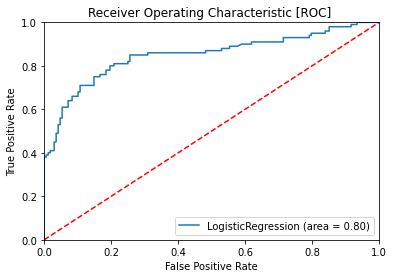

In [197]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='LogisticRegression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic [ROC] ')
plt.legend(loc='lower right')
plt.savefig('ROC-AUC[titanic].png')
plt.show()